In [5]:
#import libraries
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split

In [6]:
def missing_values_table(df):
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns


def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

def plot_correlation_heatmap(data, title='Correlation Heatmap'):
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,annot_kws={'size': 5})
    plt.title(title)
    plt.show()

def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)


# Feature Selection

In [7]:
df = pd.read_csv(r"data\creditcard_csv.csv")

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Time,0.0,0.0,1.0,1.0,2.0,2.0,4.0,7.0,7.0,9.0
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233,-0.425966,1.229658,-0.644269,-0.894286,-0.338262
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737,0.960523,0.141004,1.417964,0.286157,1.119593
V3,2.536347,0.16648,1.773209,1.792993,1.548718,1.141109,0.045371,1.07438,-0.113192,1.044367
V4,1.378155,0.448154,0.37978,-0.863291,0.403034,-0.168252,1.202613,-0.492199,-0.271526,-0.222187
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193,0.420987,0.191881,0.948934,2.669599,0.499361
V6,0.462388,-0.082361,1.800499,1.247203,0.095921,-0.029728,0.272708,0.428118,3.721818,-0.246761
V7,0.239599,-0.078803,0.791461,0.237609,0.592941,0.476201,-0.005159,1.120631,0.370145,0.651583
V8,0.098698,0.085102,0.247676,0.377436,-0.270533,0.260314,0.081213,-3.807864,0.851084,0.069539
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739,-0.568671,0.46496,0.615375,-0.392048,-0.736727


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df['Class'] = df['Class'].str.replace("'", "").astype('int64')


In [10]:
print("Número de características:", len(df.columns))
print("Longitud del conjunto de datos:", len(df))

Número de características: 31
Longitud del conjunto de datos: 284807


In [7]:
missing_values_table(df)

Your selected dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


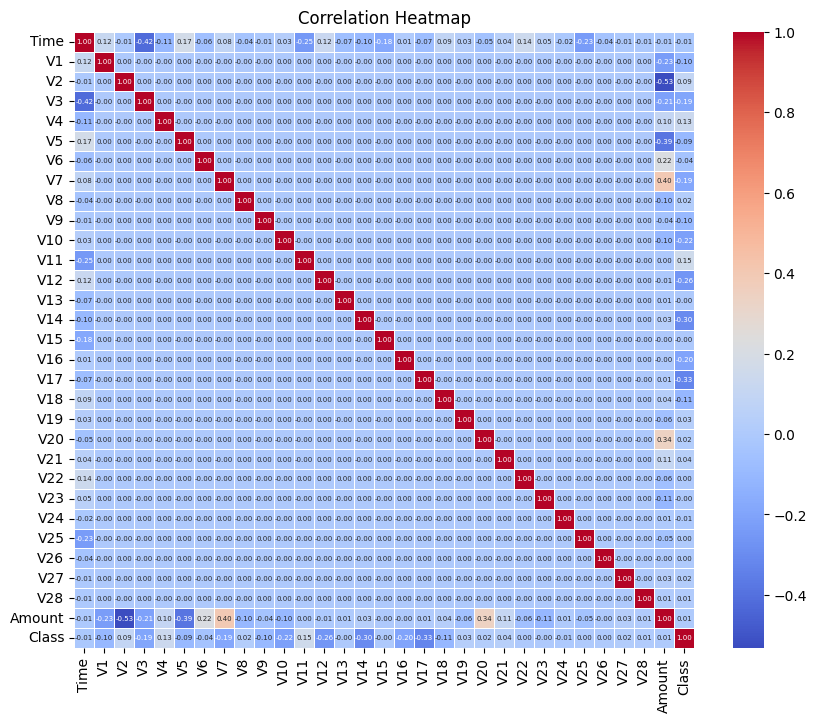

In [13]:
plot_correlation_heatmap(df)

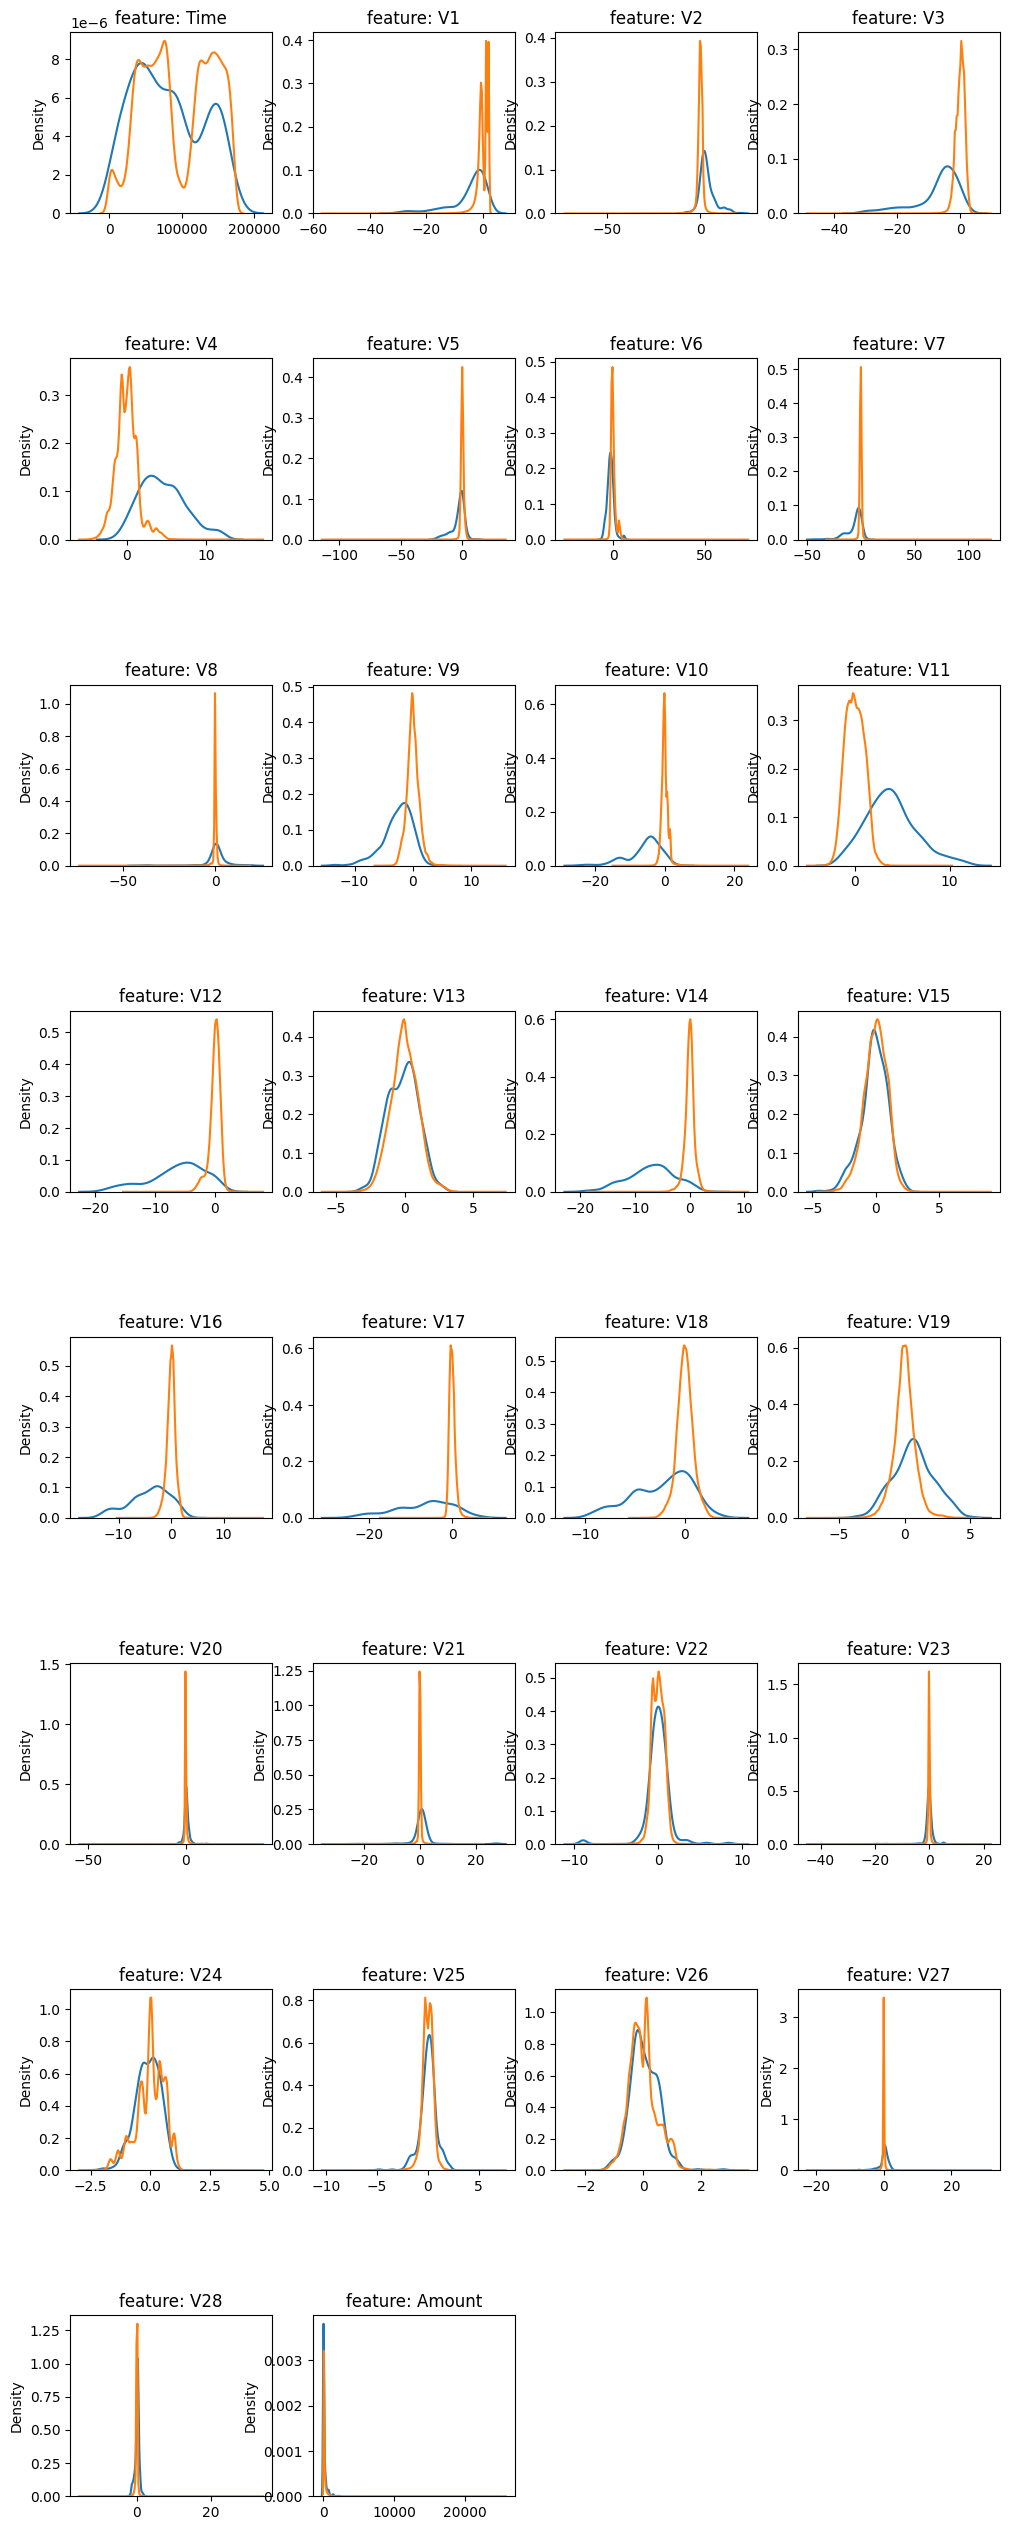

In [14]:
features = df.drop("Class", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.kdeplot(df[f][df["Class"] == 1])
    sns.kdeplot(df[f][df["Class"] == 0])
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

In [11]:
df = df.drop(["Time", "Amount"], axis=1)

In [12]:
train_set, val_set, test_set = train_val_test_split(df)

In [13]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [15]:
# Predecimos con el conjunto de datos de validación
y_pred = clf_rnd.predict(X_val)

In [16]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_pred, y_val, average='weighted'))

F1 score: 0.999518162867412


In [17]:
clf_rnd.feature_importances_

array([0.01951875, 0.00852094, 0.01422136, 0.02546572, 0.01229335,
       0.0161325 , 0.02094565, 0.01297579, 0.03014285, 0.05919365,
       0.06652838, 0.09321848, 0.01016094, 0.13248329, 0.01738156,
       0.06640842, 0.24308409, 0.0342661 , 0.01210265, 0.01718546,
       0.01422492, 0.00984573, 0.0072058 , 0.01113814, 0.00945261,
       0.01307818, 0.0123747 , 0.01044999])

In [18]:
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}

In [19]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(6)

V17    0.243084
V14    0.132483
V12    0.093218
V11    0.066528
V16    0.066408
V10    0.059194
dtype: float64

In [20]:
columns = list(feature_importances_sorted.head(6).index)

In [21]:
columns

['V17', 'V14', 'V12', 'V11', 'V16', 'V10']

In [21]:
df_reduced = df[['V17', 'V14', 'V12', 'V11', 'V16', 'V10','Class']]

In [20]:
df_reduced.to_csv("fraud_reduced.csv")